In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [2]:
data = pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Converting Sales column from Numeric to Categorical Data

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


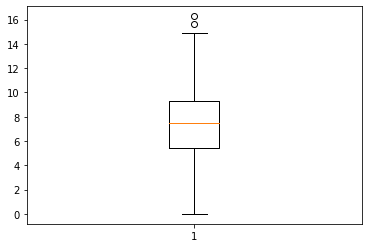

In [4]:
#Box plot of Sales column
plt.boxplot(data['Sales'])
plt.show()

In [5]:
#Calculate IQR for Sales Calumn
array = np.array(data['Sales']).reshape(-1,1)

#calculate interquartile range 
q3, q1 = np.percentile(array, [75 ,25])
q3,q1

(9.32, 5.390000000000001)

In [6]:
sales = pd.cut(data['Sales'],bins=[-1, 5.39, 9.32, 16.3 ],labels=['Low' , 'Medium' , 'High'])
sales.head()

0      High
1      High
2      High
3    Medium
4       Low
Name: Sales, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [7]:
data1 = data.copy()
data1['Sales'] = sales
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


## EDA on data1

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    category
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
dtypes: category(1), int64(7), object(3)
memory usage: 31.9+ KB


In [9]:
# Value counts
data1['Sales'].value_counts()

Medium    201
Low       100
High       99
Name: Sales, dtype: int64

In [10]:
data1['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [11]:
data1['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [12]:
data1['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

### Compairing different columns w.r.t  'y'

In [13]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


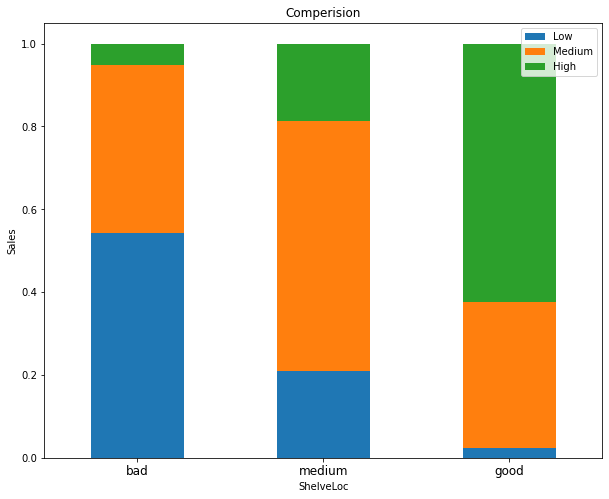

In [14]:
# Stacked barplot of Sales vs ShelveLoc
bad = data1.loc[data1['ShelveLoc']=='Bad', :]['Sales'].value_counts(normalize = True)
medium = data1.loc[data1['ShelveLoc']=='Medium', :]['Sales'].value_counts(normalize = True)
good = data1.loc[data1['ShelveLoc']=='Good', :]['Sales'].value_counts(normalize = True)
data1_plot  = pd.DataFrame([bad,medium,good])
data1_plot.index=['bad','medium','good']

# Plot
data1_plot.plot(kind='bar',figsize = (10,8),stacked=True, title='Stacked Bar plot')
plt.xlabel('ShelveLoc')
plt.ylabel('Sales')
plt.xticks(rotation = 0, fontsize = 12)
plt.title('Comperision');

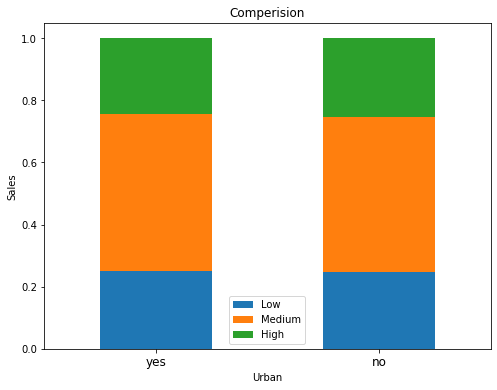

In [15]:
# Stacked barplot of Sales vs ShelveLoc
yes = data1.loc[data1['Urban']=='Yes', :]['Sales'].value_counts(normalize = True)
no = data1.loc[data1['Urban']=='No', :]['Sales'].value_counts(normalize = True)
data1_plot  = pd.DataFrame([yes,no])
data1_plot.index=['yes','no']

# Plot
data1_plot.plot(kind='bar',figsize = (8,6),stacked=True, title='Stacked Bar plot')
plt.xlabel('Urban')
plt.ylabel('Sales')
plt.xticks(rotation = 0, fontsize = 12)
plt.title('Comperision');

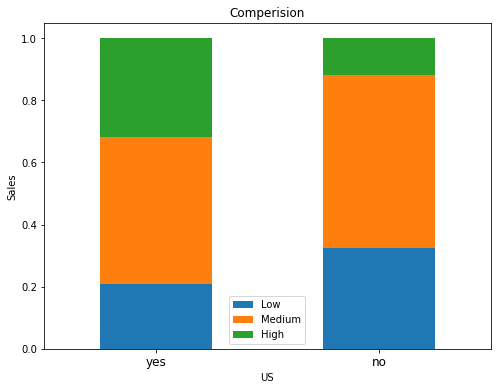

In [16]:
# Stacked barplot of Sales vs ShelveLoc
yes = data1.loc[data1['US']=='Yes', :]['Sales'].value_counts(normalize = True)
no = data1.loc[data1['US']=='No', :]['Sales'].value_counts(normalize = True)
data1_plot  = pd.DataFrame([yes,no])
data1_plot.index=['yes','no']

# Plot
data1_plot.plot(kind='bar',figsize = (8,6),stacked=True, title='Stacked Bar plot')
plt.xlabel('US')
plt.ylabel('Sales')
plt.xticks(rotation = 0, fontsize = 12)
plt.title('Comperision');

## Model Building

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report , accuracy_score , f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [18]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


In [19]:
data1.shape

(400, 11)

In [20]:
maped_data = data1['Sales'].map({'High':2 , 'Medium':1 , 'Low':0})
data1['Sales'] = maped_data
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,111,48,16,260,83,Good,65,10,Yes,Yes
2,2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,1,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No


In [21]:
# Encoding the dataset using Label Encoder
le = LabelEncoder()

data1.iloc[:,6] = le.fit_transform(data1.iloc[:,6])
data1.iloc[:,9] = le.fit_transform(data1.iloc[:,9])
data1.iloc[:,10] = le.fit_transform(data1.iloc[:,10])

data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


In [22]:
#Scaling the dataset
scale = data.select_dtypes(include=['int16', 'int32', 'int64'])
scaler = MinMaxScaler(feature_range = (0,1))
scaled = scaler.fit_transform(scale)
scaled_data = pd.DataFrame(scaled , columns = scale.columns )
#df3.loc[:, ['Latitude', 'Longitude']] = df1[['Latitude', 'Longitude']]
scaled_data.loc[:,['ShelveLoc','Urban','US' ,'Sales']] = data1[['ShelveLoc','Urban','US','Sales']]
scaled_data.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US,Sales
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,0,1,1,2
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,1,1,1,2
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,2,1,1,2
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,2,1,1,1
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,0,1,0,0


In [23]:
X = scaled_data.iloc[:,0:-1]
y = scaled_data.iloc[:,-1]

In [24]:
X.shape , y.shape

((400, 10), (400,))

In [25]:
y.value_counts()

1    201
0    100
2     99
Name: Sales, dtype: int64

In [26]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,stratify = y, random_state = 42)

In [27]:
# Building Decision Tree
model = DecisionTreeClassifier(criterion = 'entropy' , class_weight = 'balanced' ,max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4)

In [28]:
data1.iloc[:,1:].columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

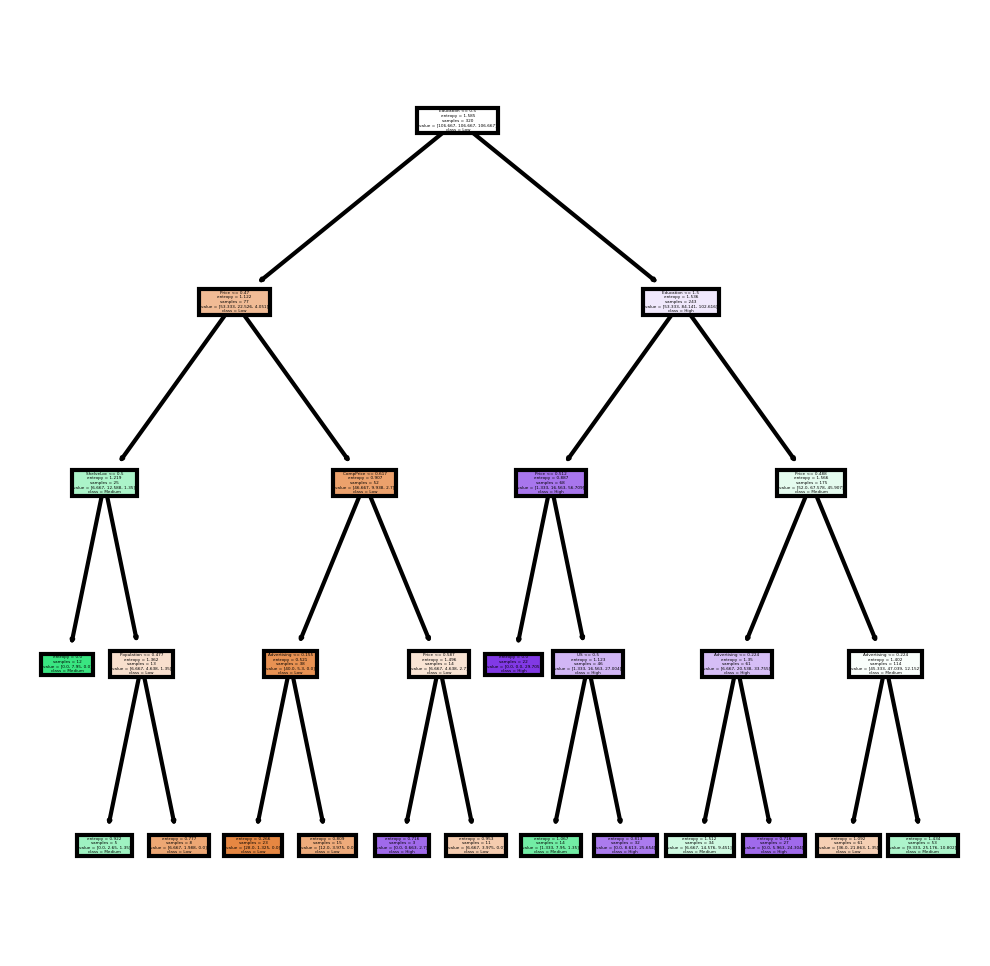

In [29]:
fn = list(data1.iloc[:,1:].columns)
cn=['Low' ,'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model, feature_names = fn, class_names=cn, filled = True);

In [30]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [31]:
print(classification_report(y_train , y_train_predict))

              precision    recall  f1-score   support

           0       0.57      0.84      0.68        80
           1       0.75      0.55      0.63       161
           2       0.73      0.77      0.75        79

    accuracy                           0.68       320
   macro avg       0.68      0.72      0.69       320
weighted avg       0.70      0.68      0.67       320



In [32]:
print(classification_report(y_test , y_test_predict))

              precision    recall  f1-score   support

           0       0.50      0.90      0.64        20
           1       0.65      0.38      0.48        40
           2       0.62      0.65      0.63        20

    accuracy                           0.57        80
   macro avg       0.59      0.64      0.58        80
weighted avg       0.61      0.57      0.56        80



In [33]:
print('Train score', accuracy_score(y_train_predict,y_train))
print('Test score', accuracy_score(y_test_predict,y_test))
print('Train f1-score', f1_score(y_train_predict,y_train, average = 'weighted'))
print('Test f1-score', f1_score(y_test_predict,y_test, average = 'weighted'))

Train score 0.675
Test score 0.575
Train f1-score 0.6786469609013148
Test f1-score 0.5926538908246226


### Pre pruning techniques on our Model

In [34]:
params = {'criterion':['entropy','gini'] ,'max_depth': [2,4,6,8,10,12], 'min_samples_split': [2,3,4], 'min_samples_leaf': [1,2]}

model_test = DecisionTreeClassifier(class_weight = 'balanced')
gcv = GridSearchCV(estimator=model_test,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [35]:
print(gcv.best_score_)
print(gcv.best_estimator_)
print(gcv.best_params_)

0.6
DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                       min_samples_split=3)
{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [36]:
model1 = gcv.best_estimator_
model1.fit(X_train,y_train)
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

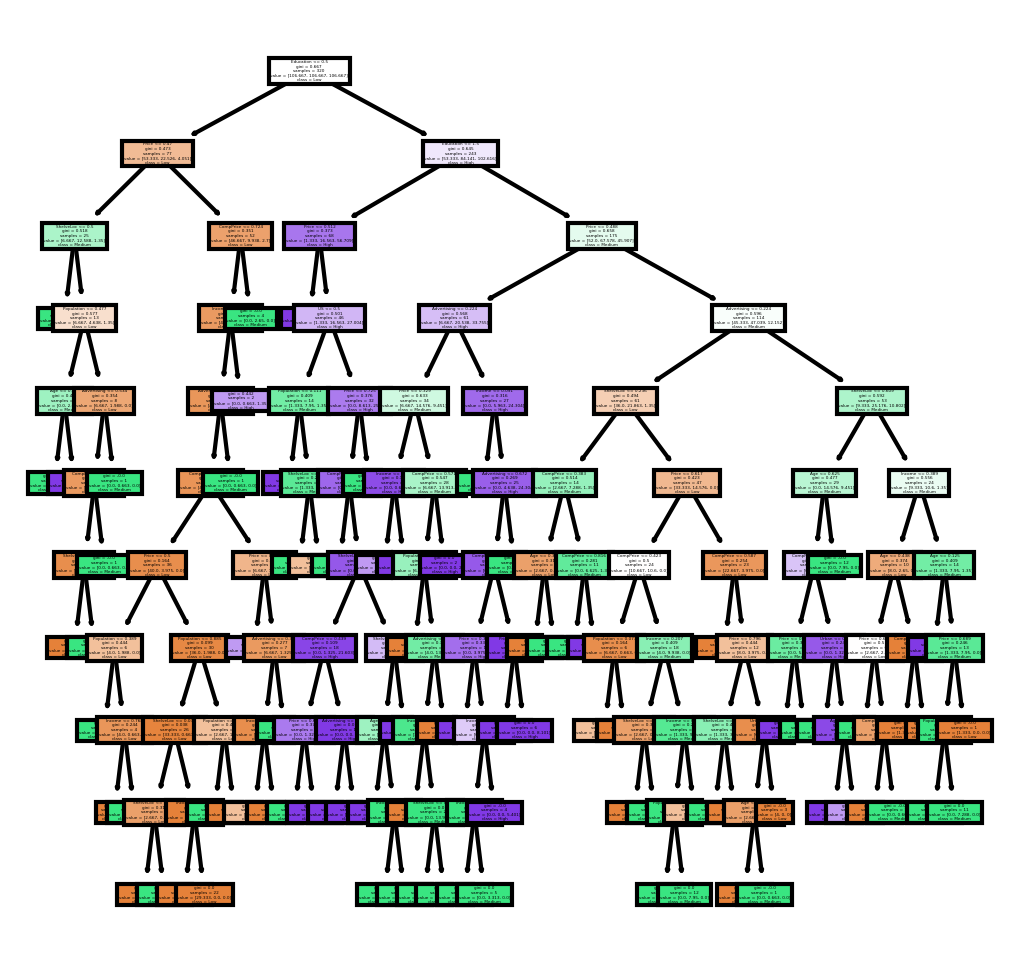

In [37]:
fn = list(data1.iloc[:,1:].columns)
cn=['Low' ,'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model1, feature_names = fn, class_names=cn, filled = True);

In [38]:
print(f'Train score {accuracy_score(y_train_predict,y_train)}')
print(f'Test score {accuracy_score(y_test_predict,y_test)}')

Train score 0.675
Test score 0.575


### Post pruning techniques on our Model

In [39]:
model_test = DecisionTreeClassifier(class_weight = 'balanced')

In [40]:
path = model_test.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas , '\n' , impurities)

[0.00000000e+00 2.75831807e-18 2.75831807e-18 5.51663615e-18
 5.55111512e-18 8.96453374e-18 9.83741921e-18 1.10332723e-17
 1.26422912e-17 1.44811699e-17 1.78010443e-17 1.88323917e-03
 1.88323917e-03 1.88323917e-03 1.88536953e-03 1.91387560e-03
 2.03004466e-03 2.76625173e-03 2.76625173e-03 2.77777778e-03
 2.77777778e-03 3.14198452e-03 3.18979266e-03 3.28968653e-03
 3.31674959e-03 3.31674959e-03 3.31674959e-03 3.55239787e-03
 3.74659572e-03 3.76974411e-03 3.90148744e-03 4.37023355e-03
 4.51972277e-03 4.56246502e-03 4.56949615e-03 5.59049616e-03
 5.79040920e-03 5.98503741e-03 6.46117768e-03 6.72551492e-03
 6.79883148e-03 7.01016474e-03 7.21951818e-03 7.22258786e-03
 7.60456274e-03 7.64866939e-03 7.84849694e-03 8.72726344e-03
 1.00614853e-02 1.01393226e-02 1.02822257e-02 1.05006398e-02
 1.05324212e-02 1.09168829e-02 1.12642130e-02 1.13928205e-02
 1.16523676e-02 1.64468913e-02 1.65267960e-02 1.70760373e-02
 1.75953230e-02 1.94773617e-02 1.96714623e-02 3.72257119e-02
 5.71370174e-02 6.461833

In [41]:
# For each alpha we will append our model to a list
test_model = []
for ccp_alpha in ccp_alphas:
    model_test = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model_test.fit(X_train, y_train)
    test_model.append(model_test)

In [42]:
test_model[:5]

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=2.7583180736028624e-18, random_state=0),
 DecisionTreeClassifier(ccp_alpha=2.7583180736028624e-18, random_state=0),
 DecisionTreeClassifier(ccp_alpha=5.516636147205725e-18, random_state=0),
 DecisionTreeClassifier(ccp_alpha=5.551115123125761e-18, random_state=0)]

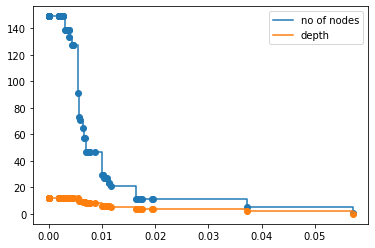

In [43]:
test_model = test_model[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [model_test.tree_.node_count for model_test in test_model]
depth = [model_test.tree_.max_depth for model_test in test_model]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

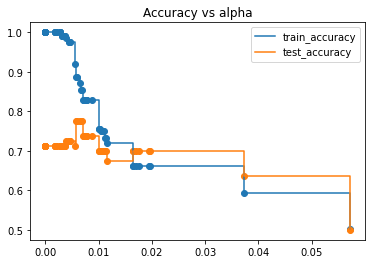

In [44]:
#plot for training and testing accuracy
train_acc = []
test_acc = []
for c in test_model:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))
    
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [45]:
model2 = DecisionTreeClassifier(ccp_alpha=0.0093)
model2.fit(X_train,y_train)
y_train_predict = model2.predict(X_train)
y_test_predict = model2.predict(X_test)

print(f'Train score {accuracy_score(y_train_predict,y_train)}')
print(f'Test score {accuracy_score(y_test_predict,y_test)}')

Train score 0.7875
Test score 0.725


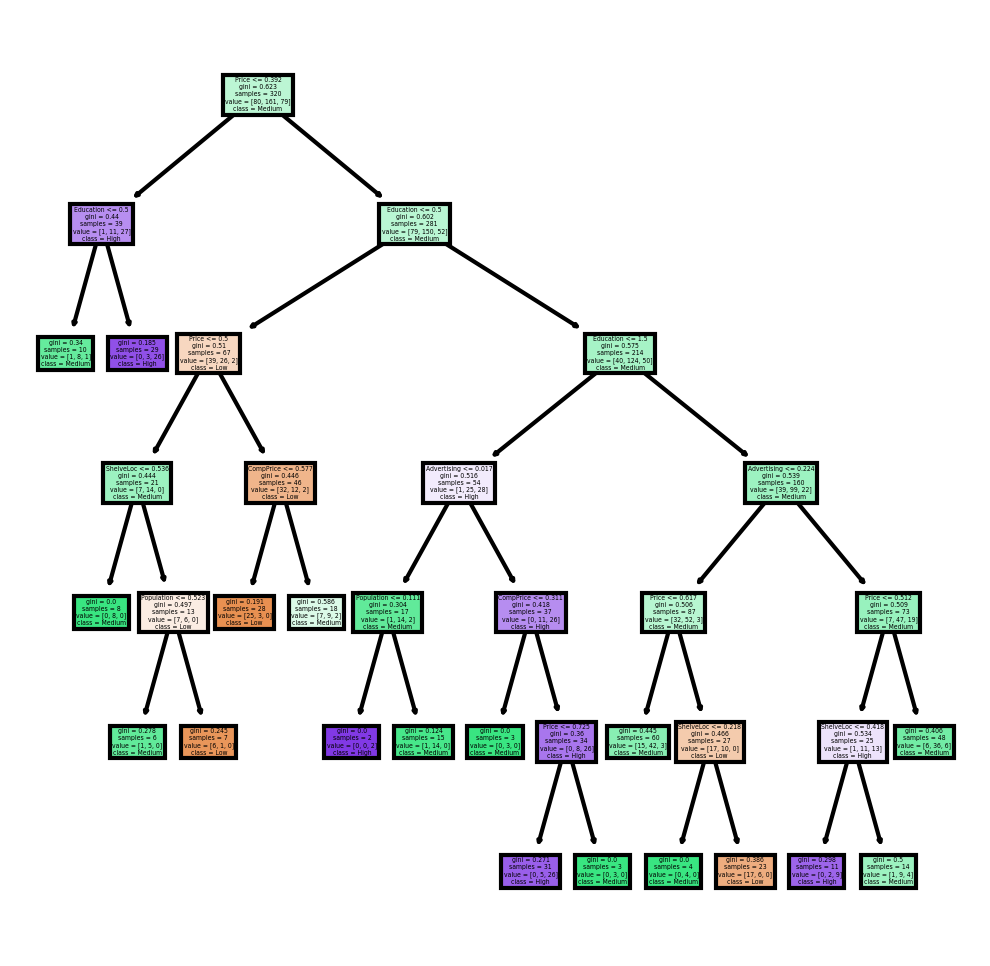

In [46]:
fn = list(data1.iloc[:,1:].columns)
cn=['Low' ,'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model2, feature_names = fn, class_names=cn, filled = True);

## Final model


In [47]:
final_model = DecisionTreeClassifier(ccp_alpha=0.0093)
final_model.fit(X_train , y_train)

y_train_predict = final_model.predict(X_train)
y_test_predict = final_model.predict(X_test)

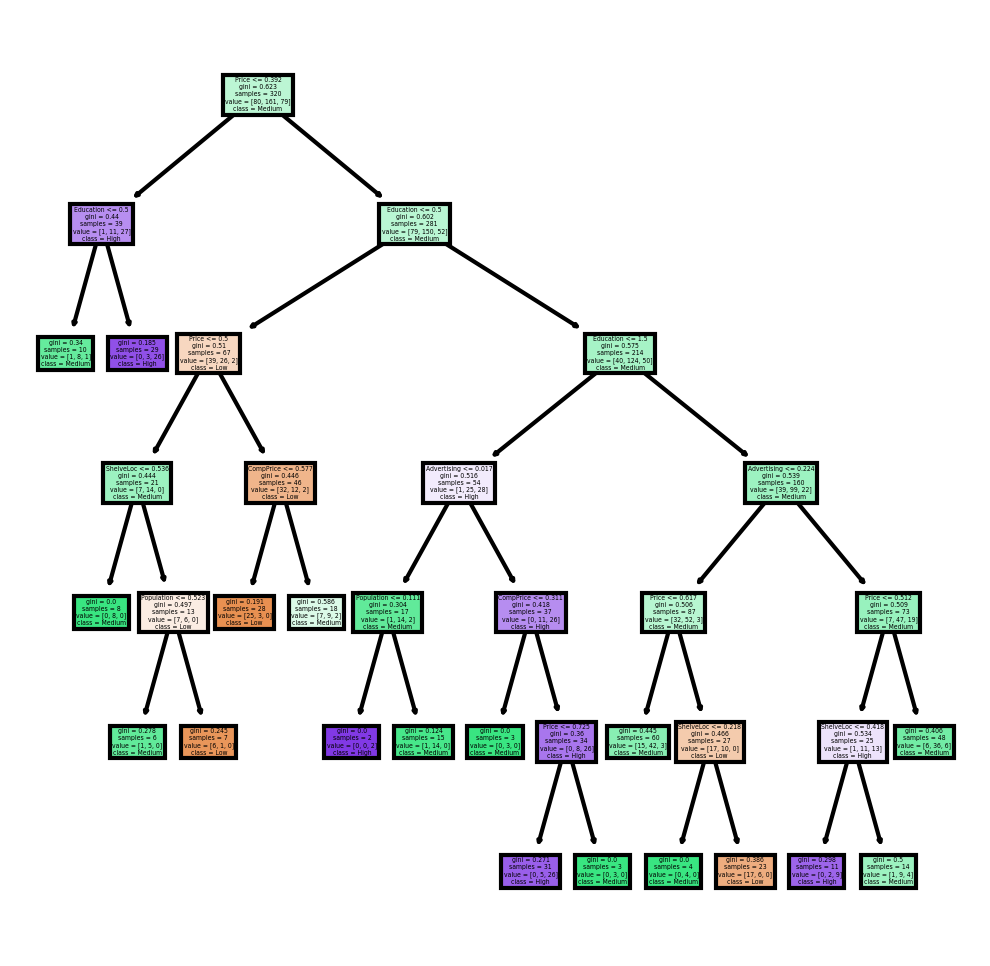

In [48]:
fn = list(data1.iloc[:,1:].columns)
cn=['Low' ,'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model2, feature_names = fn, class_names=cn, filled = True);

In [49]:
print(f'Train score {accuracy_score(y_train_predict,y_train)}')
print(f'Test score {accuracy_score(y_test_predict,y_test)}')

Train score 0.7875
Test score 0.725
